# 경사하강법 - 실제값 예측값을 서로 좁혀가며 값을 찾아가는 방법

In [11]:
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('../dataSet/LinearRegressionData.csv')
dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 학습 횟수, 학습율(1e-4 == 0.0001), versbose=1 (학습결과 출력)
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=0)
sr.fit(X_train,y_train)


# plt.scatter(X_train,y_train, color='blue')
# plt.plot(X_train, sr.predict(X_train), color='green')
# plt.title('Score by hours(test data, SGD)')
# plt.xlabel('hours')
# plt.ylabel('score')
# plt.show()
sr.coef_, sr.intercept_



print('train',sr.score(X_train,y_train))
print('test',sr.score(X_test,y_test))

train 0.6837363504701681
test 0.884872663907813


c:\study_python_3106\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
#추가학습

x데이터 [[ 0.5]
 [ 1.2]
 [ 1.8]
 [ 2.4]
 [ 2.6]
 [ 3.2]
 [ 3.9]
 [ 4.4]
 [ 4.5]
 [ 5. ]
 [ 5.3]
 [ 5.8]
 [ 6. ]
 [ 6.1]
 [ 6.2]
 [ 6.9]
 [ 7.2]
 [ 8.4]
 [ 8.6]
 [10. ]]
X_range [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.
 4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8
 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6
 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4
 9.5 9.6 9.7 9.8 9.9]
X_range개수 (95,)


C:\Users\human-07\AppData\Local\Temp\ipykernel_4224\1697692236.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X),max(X),0.1)


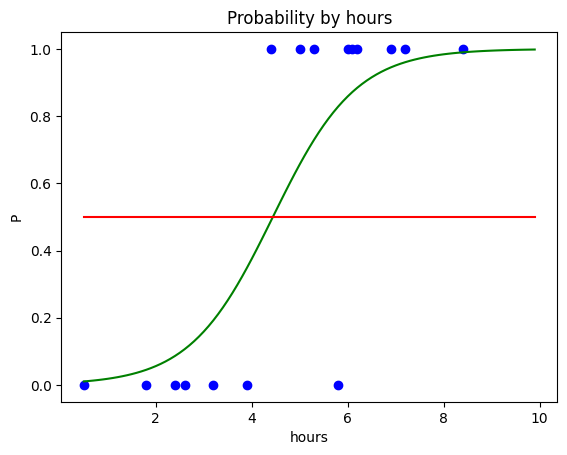

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

dataset = pd.read_csv('../dataSet/LogisticRegressionData.csv')
dataset.head()


X=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values
print('x데이터',X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

classifier.predict([[6]])
# predict_proba 각 클래스에 속할 확률(0의 예측/1의 예측)
classifier.predict_proba([[6]])

classifier.predict([[4]])
# array([[0.62497682, 0.37502318]])으로 60% 불합격으로 나온다
classifier.predict_proba([[4]])

# 테스트 데이터 20%로 4개오 예측 -> 실제 결과값과 다르, 즉 예측이 100%아님
# [1 0 1 1](예측) , [1 0 1 0](주어진)
y_predict= classifier.predict(X_test)
y_predict_pro = classifier.predict_proba(X_test)

# print('X_test의 데이터들\n',X_test)
# print('y_test의 데이터들\n',y_test)

# 값의 정확도
classifier.score(X_test,y_test)
# 0.1단위로 쪼개서
X_range = np.arange(min(X),max(X),0.1)
print('X_range',X_range)

# 개수
X_range.shape
print('X_range개수',X_range.shape)

# 위의 reshape 예시 arr = np.array([[1, 2, 3], [4, 5, 6]])

# (2, 3) 형태의 배열을 (6,) 형태의 1차원 배열로 변환 arr_reshaped = arr.reshape(-1) print(arr_reshaped) # 출력: [1 2 3 4 5 6]
# -> -1 : 배치를 알아서 자율성을 준다
# (2, 3) 형태의 배열을 (3, 2) 형태의 배열로 변환 arr_reshaped = arr.reshape(3, -1) print(arr_reshaped) # 출력: [[1 2], [3 4],[5 6]]
# ->2행 3열을 행의 개수를 3으로 fix해놓고 열 부분에 자율성준다

p = 1/(1+ np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
p =p.reshape(-1)
p.shape

# 시각화
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_range,p,color='green')
plt.plot(X_range,np.full(len(X_range),0.5),color='red')
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()


# 의사결정 나무

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 데이터 로드 - 꽃의 넓이와 높이로 종을 구분하기 위해 데이터 가져옴
iris = load_iris()
X=iris.data
y=iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print('X_test데이터:',X_test)
print('y_test데이터:',y_test)

# 나무 모델
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

clf.predict(X_test)

# 정확도 평가
print('Accuracy:', clf.score(X_test,y_test))


X_test데이터: [[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]
 [6.9 3.1 5.1 2.3]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [6.5 3.2 5.1 2. ]
 [4.8 3.  1.4 0.1]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.5 0.3]
 [6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]]
y_test데이터: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy: 1.0


# 나이브 베이즈 

In [51]:
# 스팸메일 분류 예제 - *데이터 전처리(원시데이터 ->(전처리)->원천데이터,라벨링데이터)
import pandas as pd
from sklearn.model_selection import train_test_split
# 비슷한것 끼리 묶어서 군집화한것 TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('../dataSet/spam.csv', encoding='ISO-8859-1')
# 필요한 열만 선택
data =data[['v1','v2']] 
# 열 이름 변경
data.columns = ['label','text']

# 데이터 전처리
data['label'] = data['label'].map({'ham':0,'spam':1})
data.dropna(inplace=True)

# 학습용 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(data['text'],data['label'],test_size=0.2,random_state=42)

# TF-IDF 백터화 -> 비슷한 것 분류
vectorizer = TfidfVectorizer(stop_words='english')
# 데이터를 0 1 로 바꿔서
print('X_train',X_train)

X_train_tfidf = vectorizer.fit_transform(X_train)
print('X_train_tr',X_train_tfidf)
X_test_tfidf = vectorizer.transform(X_test)


model = MultinomialNB()
model.fit(X_train_tfidf,y_train)

# 예측 및 평가
y_predict = model.predict(X_test_tfidf)
print('Accuracy:',accuracy_score(y_test,y_predict)) 
# precision: 스팸정확도, recall:스팸을 잡아낸 확률, f1-score: 앞 두개의 평균?, support: 숫자(스팸의 개수수) 
# accuracy :전체로 봤을 때 정확도, 가중치가 들어간 것, 가중치가 안들어 간 것
print('\nClassification Report:\n',classification_report(y_test,y_predict))


X_train 1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: text, Length: 4457, dtype: object
X_train_tr   (0, 1371)	0.4658046386365619
  (0, 4416)	0.4528381701109944
  (0, 1706)	0.3431839629173582
  (0, 7415)	0.348722265231364
  (0, 3210)	0.348722265231364
  (0, 4520)	0.4658046386365619
  (1, 1187)	0.26161139982801973
  (1, 3140)	0.3059746053542906
  (1, 3631)	0.2804339696184593
  (1, 6296)	0.26983364803

In [ ]:
# 샘플 테스트
sample_text =[
    'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now!',
    "Congratulations! You've been selectes to receive a free iPhone 15. Click to claim now!""
    "Hey, are we meeting for lunch tomorrow?"
]
sample_tfidf = vectorizer.transform(sample_text)
predictions = model.predict(sample_tfidf)

# SVM 


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# 데이터 불러오기
data = pd.read_csv('../dataSet/spam.csv', encoding='ISO-8859-1')
data = data[['v1','v2']]
data.columns=['label','text']

In [20]:
# 데이터 전처리
# 레이블을 숫자로 변환
data['label'] = data['label'].map({'ham':0,'spam':1})
# 결측치 제거
data.dropna(inplace=True)

In [21]:
# 학습 및 테스트 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(data['text'],data['label'],test_size=0.2,random_state=42)

In [22]:
# TF-IDF 백터화
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf= vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [23]:
# SVM 모델 학습
model = SVC(kernel='linear',random_state=42)
model.fit(X_train_tfidf,y_train)

SVC(kernel='linear', random_state=42)

In [25]:
# 예측 및 평가
y_predict = model.predict(X_test_tfidf)
print('Accuracy:', accuracy_score(y_test,y_predict))
print('\nClassification Report:\n',classification_report(y_test,y_predict))

Accuracy: 0.979372197309417

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [27]:
# 샘플 테스트
sample_text = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now!",
    "Congratulations! You've been selected to receive a free iPhone 15. Click to claim now!",
    "Hey, are we meeting for lunch tomorrow?"
]
sample_tfidf =vectorizer.transform(sample_text)
predictions = model.predict(sample_tfidf)
for text, label in zip(sample_text,predictions):
    print(f"Text: {text} => {'Spam' if label == 1 else 'Ham'}")

Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now! => Spam
Text: Congratulations! You've been selected to receive a free iPhone 15. Click to claim now! => Spam
Text: Hey, are we meeting for lunch tomorrow? => Ham


# KNN(K 최근접 이웃)

In [40]:
# KNN(K 최근접 이웃) 분류 예제
# iris 데이터셋셋 : 꽃받침(Sepal)과 꽃잎(Petal)의 길이 너비로 품종을 분류
# 필요한 라이브러리 임포트
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [41]:
# 데이터 로드
iris = load_iris()
X,y = iris.data, iris.target

In [42]:
# 데이터 분할
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
# 데이터 표준화(KNN은 거리 기반 알고리즘이므로 표준화 필요)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# KNN 모델 생성 및 학습
# 군집을 3개로 나눔
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
# 테스트 데이터 예측
y_predict = knn.predict(X_test)

In [46]:
# 모델 성능 평가
print('모델 성능 평가')
print('정확도:',accuracy_score(y_test,y_predict))
print('\n분류 보고서:\n',classification_report(y_test,y_predict,target_names=iris.target_names))

모델 성능 평가
정확도: 1.0

분류 보고서:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [50]:
# 새로운 데이터 예측
new_sample=[
    [5.1, 3.5, 1.4, 0.2],  # Setosa
    [6.2, 3.4, 5.4, 2.3],  # Virginica
    [5.9, 3.0, 4.2, 1.5],  # Versicolor 
]
new_sample = scaler.transform(new_sample)
print(new_sample)
predictions = knn.predict(new_sample)

print('\n새로운 데이터에 대한 예측 결과:')
for i, pred in enumerate(predictions):
    print(f'샘플 {i+1}: {iris.target_names[pred]}')

[[-0.86445224  0.98006827 -1.33331205 -1.31260282]
 [ 0.47641375  0.75647855  0.95891497  1.49058286]
 [ 0.11072303 -0.13788033  0.27124686  0.4227026 ]]

새로운 데이터에 대한 예측 결과:
샘플 1: setosa
샘플 2: virginica
샘플 3: versicolor
